[[1.55294758]
 [0.96946902]] 
 [[1.55294758]
 [0.96946902]] 
 [[1.55294758]
 [0.96946902]] 
 [1.47009024 1.00921595]


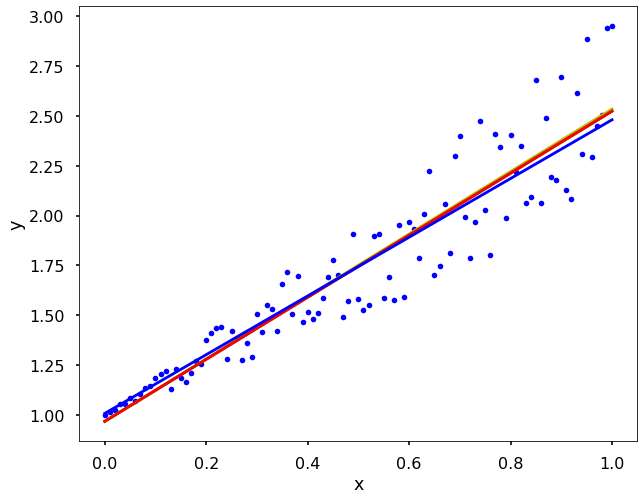

In [60]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha1 = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

# pseudo-inverse
pinv = np.linalg.pinv(A) 
alpha2 = pinv.dot(y)

# Using Numpy lstsq method
alpha3 = np.linalg.lstsq(A, y, rcond=None)[0]

# optimize curve fit from sicpy
def func(x, a, b):
    y = a*x + b
    return y

x1 = np.linspace(0, 1, 101)
y1 = 1 + x + x * np.random.random(len(x))
alpha4 = optimize.curve_fit(func, xdata = x1, ydata = y1)[0]

print(alpha1, '\n', alpha1, '\n', alpha3, '\n', alpha4)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, (1.007*alpha1[0]*x + alpha1[1]), 'y')
plt.plot(x, (alpha2[0]*x + alpha2[1]), 'g')
plt.plot(x, (alpha3[0]*x + alpha3[1]), 'r')
plt.plot(x, (alpha4[0]*x + alpha4[1]), 'b')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

alpha=0.2755916691336181, beta=0.1994567220559649


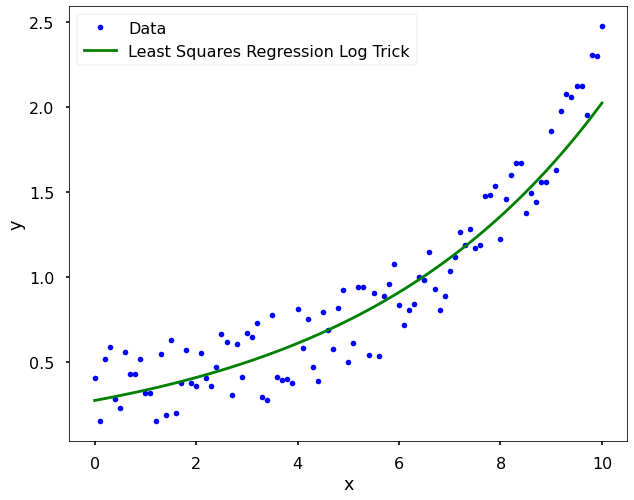

In [80]:
# let's generate x and y, and add some noise into y
x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.5*np.random.random(len(x))

# Let’s fit the data after we applied the log trick.
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha={alpha}, beta={beta}')

# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.', label='Data')
plt.plot(x, alpha*np.exp(beta*x), 'g', label='Least Squares Regression Log Tricks')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



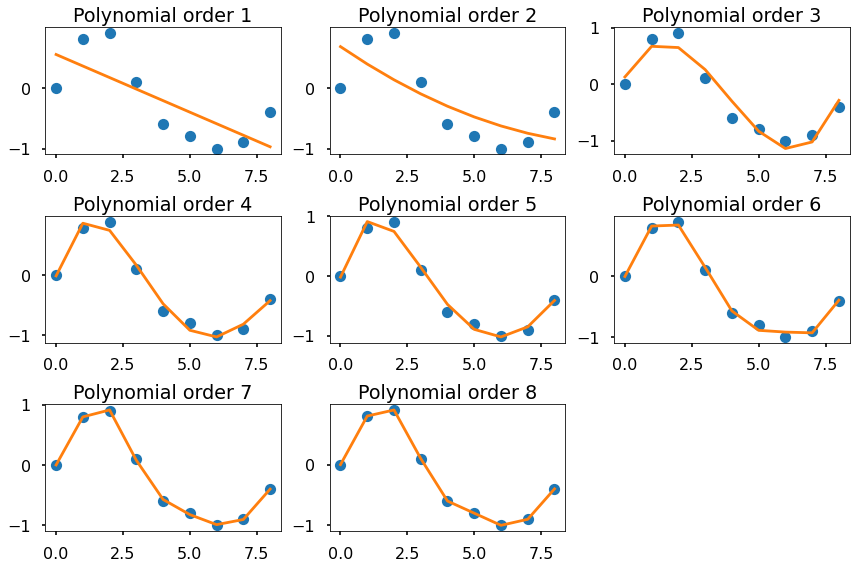

In [84]:
x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (12, 8))
for i in range(1, 9):
    
    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i)
    plt.subplot(3,3,i)
    plt.plot(x_d, y_d, 'o')
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()

alpha=0.24493105789019373, beta=0.22078725391090506


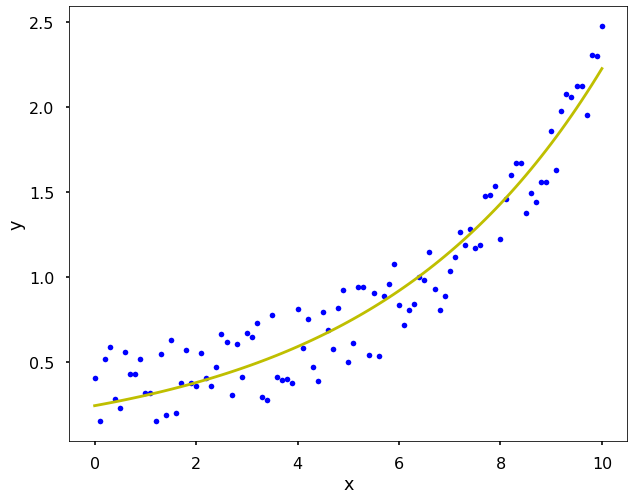

In [90]:
# let's define the function form
def func(x, a, b):
    y = a*np.exp(b*x)
    return y

alpha, beta = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(f'alpha={alpha}, beta={beta}')

# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.', label='a*np.exp(b*x)')
plt.plot(x, alpha*np.exp(beta*x), 'y', label='optimize.curve_fit')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [87]:
y

array([0.40753031, 0.15290725, 0.51910777, 0.5878883 , 0.28358221,
       0.2314403 , 0.56098348, 0.43419718, 0.43001399, 0.52220959,
       0.31699316, 0.32060751, 0.15560196, 0.55098252, 0.18770687,
       0.6309999 , 0.19983828, 0.38083011, 0.57338715, 0.37688332,
       0.35848414, 0.55233897, 0.40687374, 0.36148911, 0.47417902,
       0.66427094, 0.61808177, 0.3071358 , 0.60785344, 0.41401322,
       0.67537844, 0.65155338, 0.73258875, 0.29406118, 0.27899033,
       0.77707384, 0.41260575, 0.39803281, 0.40270852, 0.37861024,
       0.81629924, 0.58570133, 0.75749406, 0.47374249, 0.39289125,
       0.79675471, 0.69114763, 0.57669926, 0.8199183 , 0.92551597,
       0.49936263, 0.61360679, 0.94314519, 0.94375716, 0.54069816,
       0.90890552, 0.53696959, 0.88839673, 0.95882972, 1.07694487,
       0.83750003, 0.7222327 , 0.80682359, 0.84496874, 0.99926523,
       0.98308213, 1.15189144, 0.93367474, 0.80965627, 0.89031764,
       1.03970197, 1.11693554, 1.26682413, 1.19308015, 1.28640